In [8]:
import sys
import os

project_root = os.path.abspath("..")
if project_root not in sys.path:
    sys.path.insert(0, project_root)

In [9]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from data.data_loader import generateGauss
from utils.integral import grid
from Models.classification import NavieBayes

In [10]:
h = 0.01
x_grid = grid(h, start=-2, end=12)

mu_0 = [1, 1.5, 2, 2.5, 6]
sig_0 = 0.4 * np.ones_like(mu_0)
mu_1 = [4.5, 7.5, 8.5, 8, 8.5]
sig_1 = 0.9 * np.ones_like(mu_1)

data_class0 = generateGauss(mu_0, sig_0, x_grid)
data_class1 = generateGauss(mu_1, sig_1, x_grid)
all_pdfs = np.vstack([data_class0, data_class1])

y = np.array([0]*len(data_class0) + [1]*len(data_class1))
n_A, n_B = len(data_class0), len(data_class1)

In [11]:
# Logistic Regression
print("\n=== Logistic Regression ===")

custom_priors = {0: 0.5, 1: 0.5}

nb_model = NavieBayes.Model(x_grid)
nb_model.fit(all_pdfs, y, custom_priors)
decision_values = nb_model.predict_proba(all_pdfs)
preds = nb_model.predict(all_pdfs)
print(preds)
acc = np.mean(preds == y)
print(f"[LOGISTIC] Accuracy: {acc*100:.2f}%")


=== Logistic Regression ===
[0 0 0 0 0 1 1 1 1 1]
[LOGISTIC] Accuracy: 100.00%


In [12]:
new_pdf = generateGauss([3], [0.9], x_grid)

pred = nb_model.predict([new_pdf])
prob = nb_model.predict_proba([new_pdf])

print(f"[NB] New sample → Class: {pred}, Probability (class 1): {prob[0][0]}")

[NB] New sample → Class: [0], Probability (class 1): 0.8322451124490285


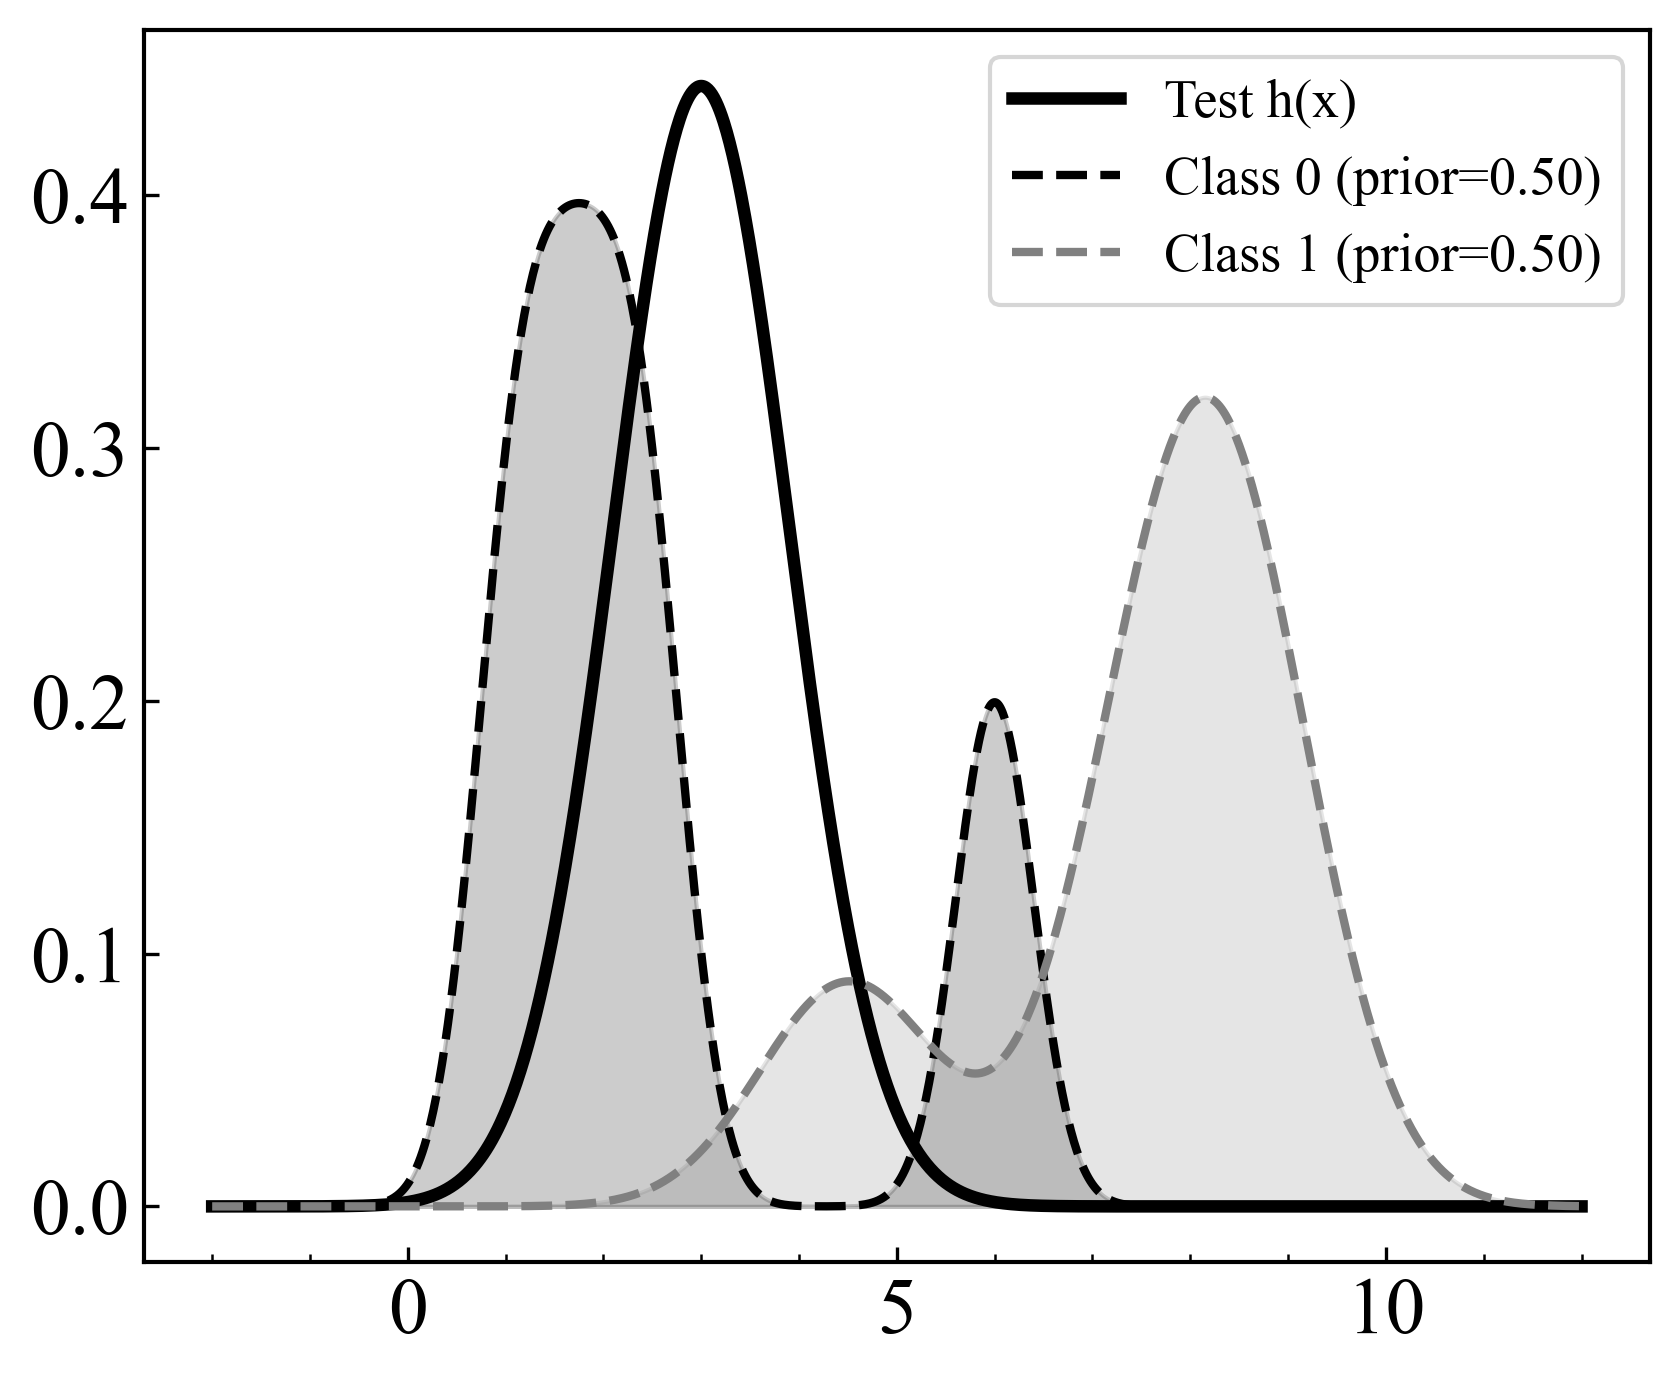

In [13]:
explanation = nb_model.explain(new_pdf)

In [14]:
print("Likelihood f(h|c):", explanation["likelihood"])
print("Posterior P(c|h):", explanation["posterior"])

Likelihood f(h|c): {np.int64(0): np.float64(0.15609156275429165), np.int64(1): np.float64(0.03146323380674144)}
Posterior P(c|h): {np.int64(0): np.float64(0.8322451124490285), np.int64(1): np.float64(0.16775488755097148)}
